In [19]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(Banksy))
suppressMessages(library(SeuratObject))
suppressMessages(library(sp))
suppressMessages(library(SummarizedExperiment))
suppressMessages(library(SpatialExperiment))

In [1]:
obj <- readRDS('../../results/04_spatial/01_read_data/HC01.rds')

In [4]:
obj

An object of class Seurat 
18085 features across 2035 samples within 1 assay 
Active assay: Spatial (18085 features, 0 variable features)
 2 layers present: counts, data
 1 image present: slice1

In [10]:
counts <- as.matrix(obj@assays$Spatial@layers$counts)
colnames(counts) <- colnames(obj)
rownames(counts) <- rownames(obj)


# locs <- as.matrix(adata$obsm[['spatial']]) 
# rownames(locs) <- adata$obs_names
# colnames(locs) <- c("col", "row")

# se <- SpatialExperiment(assay = list(counts = counts), 
#                         spatialCoords = locs, 
#                         colData = adata$obs)

In [17]:
locs <- obj@images$slice1@coordinates

In [21]:
se <- SpatialExperiment(assay = list(counts = counts), 
                        spatialCoords = as.matrix(locs), 
                        colData = obj@meta.data)

In [22]:
se

class: SpatialExperiment 
dim: 18085 2035 
metadata(0):
assays(1): counts
rownames(18085): SAMD11 NOC2L ... MT-ND6 MT-CYB
rowData names(0):
colnames(2035): AACACTTGGCAAGGAA-1 AACAGGATTCATAGTT-1 ...
  TGTTGGATGGACTTCT-1 TGTTGGCCAGACCTAC-1
colData names(4): orig.ident nCount_Spatial nFeature_Spatial sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
spatialCoords names(5) : tissue row col imagerow imagecol
imgData names(0):

In [23]:
seu <- as.Seurat(se, data = NULL)
seu <- Seurat::NormalizeData(seu)

In [24]:
aname <- "normcounts"
assay(se, aname) <- GetAssayData(seu)

In [25]:
se

class: SpatialExperiment 
dim: 18085 2035 
metadata(0):
assays(2): counts normcounts
rownames(18085): SAMD11 NOC2L ... MT-ND6 MT-CYB
rowData names(0):
colnames(2035): AACACTTGGCAAGGAA-1 AACAGGATTCATAGTT-1 ...
  TGTTGGATGGACTTCT-1 TGTTGGCCAGACCTAC-1
colData names(4): orig.ident nCount_Spatial nFeature_Spatial sample_id
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
spatialCoords names(5) : tissue row col imagerow imagecol
imgData names(0):

In [26]:
k_geom <- c(15, 30)

se <- Banksy::computeBanksy(se, assay_name = aname, compute_agf = TRUE, k_geom = k_geom)

set.seed(1000)
se <- Banksy::runBanksyPCA(se, use_agf = TRUE, lambda = 0.2, npcs = 30)
se <- Banksy::runBanksyUMAP(se, use_agf = TRUE, lambda = 0.2)
se <- Banksy::clusterBanksy(se, use_agf = TRUE, lambda = 0.2, algo = "leiden")

Computing neighbors...

Spatial mode is kNN_median

Parameters: k_geom=15

Done

Computing neighbors...

Spatial mode is kNN_median

Parameters: k_geom=30

Done

Computing harmonic m = 0

Using 15 neighbors

Done

Computing harmonic m = 1

Using 30 neighbors

Centering

Done



[1] 2  4  3  4  10 5  7  2  4  1  5  1  4  14 5  14 7  7  5  11 9  12 5  3 
  [25] 1  7  9  5  10 11 12 2  2  3  13 9  9  5  8  11 1  6  14 3  6  2  1  8 
  [49] 6  6  1  9  5  7  3  10 12 13 9  14 11 9  2  1  1  7  6  3  13 9  7  1 
  [73] 2  7  7  10 6  7  2  1  3  3  9  3  7  9  8  9  6  3  12 1  8  6  5  2 
  [97] 5  14 1  6  3  9  7  3  9  4  1  1  1  11 8  2  9  6  7  6  5  10 5  5 
 [121] 12 6  2  8  9  8  4  2  4  1  2  1  12 9  6  10 5  9  7  7  2  5  7  3 
 [145] 2  10 6  11 7  1  5  3  12 10 10 5  12 1  5  7  8  2  4  8  1  4  5  6 
 [169] 5  12 13 2  12 4  7  6  11 3  4  6  4  2  6  14 1  9  10 1  8  9  4  1 
 [193] 4  10 2  13 2  11 6  7  6  3  4  10 1  10 2  3  4  9  5  12 9  10 1  11
 [217] 1  11 9  3  14 8  3  8  3  1  1  8  2  3  8  1  7  4  5  4  4  3  1  2 
 [241] 12 2  2  8  5  3  3  13 5  8  4  10 11 10 9  9  4  5  12 2  2  7  5  7 
 [265] 12 4  6  13 13 2  1  1  6  4  3  4  1  1  2  10 11 6  2  8  2  10 4  13
 [289] 5  8  2  6  7  12 9  2  12 5  5  5  2  6  7  3  5  13 6  4  3  4  9  6 
 [313] 5  13 3  1  4  4  2  7  6  6  4  4  1  14 3  2  3  2  8  1  2  14 10 4 
 [337] 2  4  8  1  2  4  7  4  5  5  5  14 5  6  9  3  5  4  4  6  10 6  3  1 
 [361] 5  2  7  1  6  7  1  11 10 4  3  7  10 2  13 10 8  3  8  9  3  4  9  14
 [385] 8  10 2  2  7  11 3  1  1  2  9  7  4  7  5  2  7  1  4  3  7  8  1  10
 [409] 13 3  8  4  3  1  6  4  1  4  3  2  1  14 12 9  6  6  4  7  2  3  4  10
 [433] 4  5  9  13 7  8  10 2  2  3  5  5  11 8  1  7  2  9  7  5  5  3  5  4 
 [457] 1  9  6  6  3  8  6  3  9  4  3  12 2  7  14 7  1  10 4  2  7  1  5  3 
 [481] 12 2  3  3  8  7  3  12 5  5  4  2  8  7  5  1  1  12 1  9  3  11 11 11
 [505] 9  10 5  11 8  3  2  3  1  3  2  3  7  1  11 13 1  13 12 11 13 9  12 12
 [529] 13 13 7  1  3  3  10 8  9  2  3  6  7  5  6  2  2  2  3  10 2  6  4  9 
 [553] 10 8  11 4  1  2  3  1  10 8  13 6  3  3  3  13 11 13 3  3  1  3  4  1 
 [577] 6  1  14 6  11 12 6  9  6  8  2  2  8  10 2  3  4  6  12 11 1  7  1  3 
 [601] 8  4  1  10 11 6  14 8  1  12 2  6  11 1  8  2  3  7  3  13 8  12 11 3 
 [625] 9  11 3  10 13 2  7  6  2  8  11 3  5  13 2  9  1  8  7  6  4  1  6  1 
 [649] 8  3  8  5  8  10 12 14 13 9  7  7  5  5  2  3  2  1  9  1  10 2  6  11
 [673] 3  2  2  7  10 5  4  3  1  2  4  1  6  2  10 8  2  10 11 3  1  5  2  12
 [697] 10 1  4  1  6  3  13 6  4  3  1  11 6  13 9  5  3  2  13 1  8  2  7  11
 [721] 3  1  11 2  5  8  10 1  10 12 10 5  8  4  8  5  13 1  10 13 5  5  7  5 
 [745] 3  3  3  11 8  4  2  4  1  3  8  7  4  7  1  5  10 7  7  10 10 4  5  7 
 [769] 3  5  1  10 4  3  5  13 11 6  3  3  11 2  5  1  7  4  2  3  6  1  3  2 
 [793] 3  4  4  10 10 12 2  2  1  9  3  13 2  13 1  2  6  8  10 13 13 7  4  4 
 [817] 9  6  1  13 10 14 8  11 5  13 10 1  4  12 8  3  2  9  9  4  12 4  9  2 
 [841] 1  13 5  14 13 7  11 6  4  3  8  3  2  2  9  13 7  2  4  13 2  6  2  4 
 [865] 9  12 5  10 11 8  12 1  1  10 8  14 11 2  1  2  5  13 5  1  14 6  9  3 
 [889] 6  3  4  1  7  1  2  2  11 8  3  4  6  1  10 2  8  9  9  7  2  10 3  2 
 [913] 8  13 4  1  8  10 3  4  5  8  1  12 5  10 2  3  2  2  1  2  6  6  1  12
 [937] 8  8  7  1  2  5  3  13 2  4  1  11 1  1  7  2  12 8  4  13 13 8  7  5 
 [961] 1  10 9  11 14 6  3  1  4  3  7  1  5  5  14 3  9  2  1  3  8  5  5  14
 [985] 3  3  6  11 12 9  8  5  5  8  11 7  8  12 1  3  3  13 9  4  8  8  4  13
[1009] 10 2  6  13 7  1  6  6  13 3  7  9  5  7  3  9  9  9  3  2  13 4  5  1 
[1033] 5  2  4  2  5  6  1  11 9  4  9  3  3  7  8  4  3  9  11 10 6  2  3  1 
[1057] 13 2  10 9  1  6  2  11 4  3  13 6  2  1  10 5  5  3  10 10 2  11 7  11
[1081] 14 4  3  2  3  5  7  2  13 5  3  12 3  5  2  6  2  14 3  2  5  7  8  5 
[1105] 1  1  9  1  2  8  1  9  3  1  4  11 10 8  9  1  8  11 3  8  12 4  3  11
[1129] 2  5  1  3  13 6  9  5  2  2  2  4  3  5  10 8  3  9  10 4  12 2  10 8 
[1153] 13 12 1  8  3  3  7  5  8  6  8  9  3  4  3  3  6  7  3  10 3  2  12 1 
[1177] 3  7  2  1  6  7  4  3  11 5  13 1  7  8  9  10 4  5  4  10 8  3  1  6 
[1201] 3  5  5  3  8  3  9  4  5  4  7  3  13 5  1  6

In [30]:
obj@meta.data$banksy_cluster <- colData(se)$clust_M1_lam0.2_k50_res1

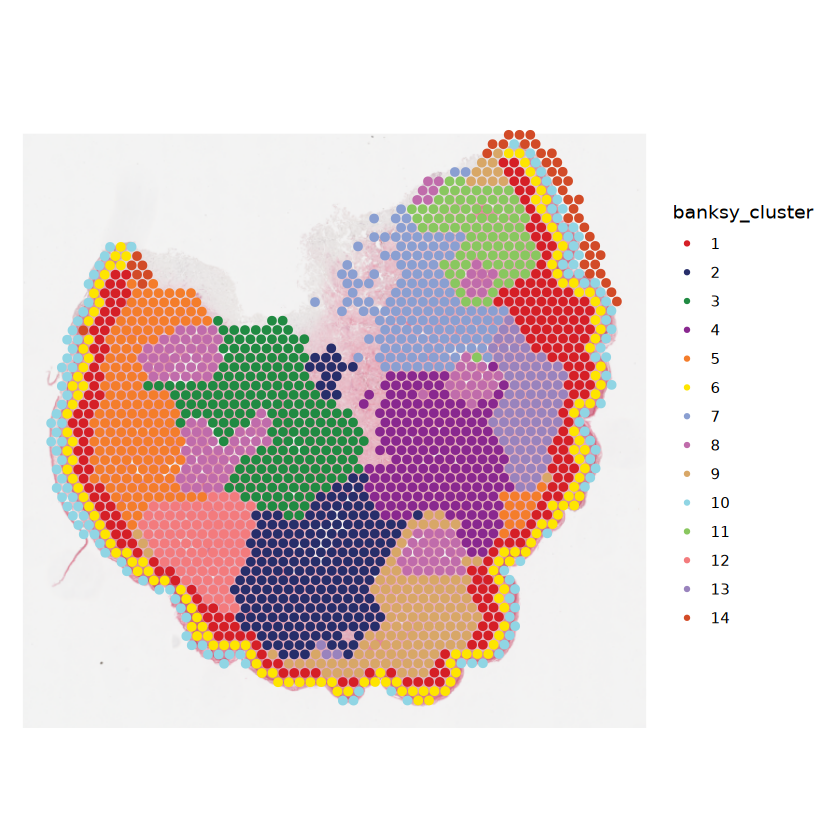

In [33]:
SpatialDimPlot(obj, group.by = "banksy_cluster", 
               cols = ArchR::paletteDiscrete(obj@meta.data$banksy_cluster))